간단한 regression problem을 먼저 살펴보자.


In [ ]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0] 
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4] 
t_c = torch.tensor(t_c) 
t_u = torch.tensor(t_u)

$$t_c=w*t_u+b$$ 
위 식으로 예측할 수 있을 것이다.

 w,b는 각각 weight, bias라는 의미이다.

 **Loss function**
 
 Loss function은 러닝 과정에서 최소화 하고자 하는 값을 의미한다. 

 위 경우에는 예측한 값과 실제 값의 차이를 loss function을 하도록 하겠다. 
 
 하지만 음수가 나오는 것을 피하기 위해서 |t_p-t_c| 또는 (t_p-t_c)^2을 사용하도록 하자.

이렇게 설정하면 w,b에 대해서 모두 loss function은 convex하게 된다. 

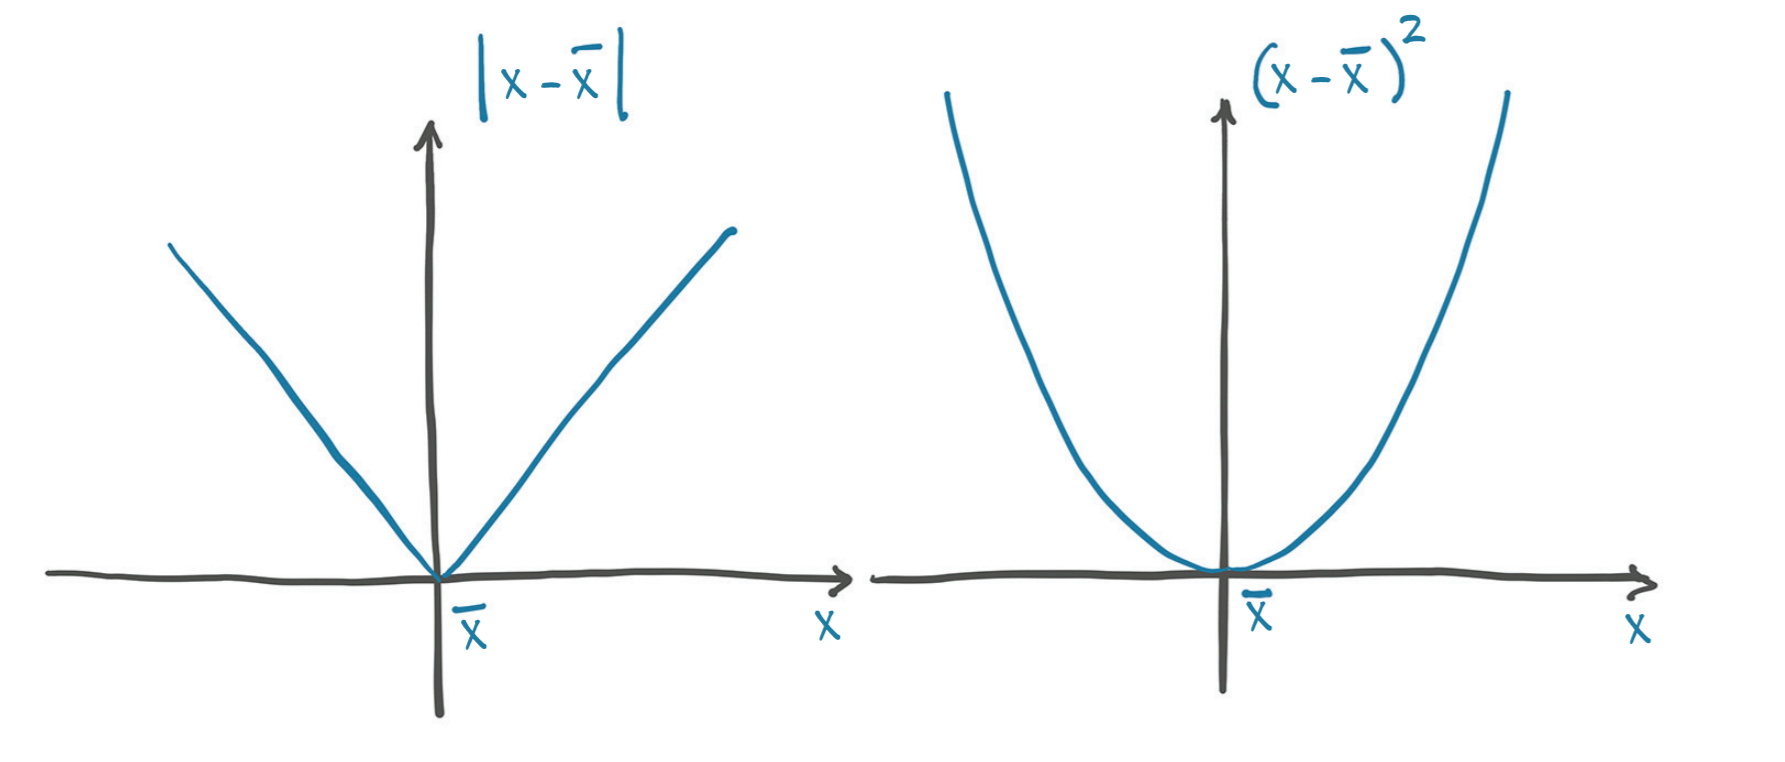


In [ ]:
def model(t_u,w,b):
    return w*t_u+b


In [ ]:
def loss_fn(t_p,t_c):
    squared_diffs = (t_p-t_c)**2
    return squared_diffs.mean()
## (t_p-t_c)^2을 사용
## Mean Square Loss


In [ ]:
import torch
w = torch.ones(())
b = torch.zeros(())
t_p=model(t_u,w,b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [ ]:
loss = loss_fn(t_p,t_c)
loss

tensor(1763.8848)

이제 model 그에 해당하는 loss를 구하는 데에 성공하였다.

그렇다면 이제 w,b를 조절하여 loss function이 최소가 되도록 하는 것이 중요할 것이다.

우리는 이를 위해 gradient descent algorithm을 사용하 것이다. 

먼저 작은 delta를 더해 얼마나 변화를 하는지를 계산해 볼 것이다.



In [ ]:
delta = 0.1
loss_rate_of_change_w= (loss_fn(model(t_u, w + delta, b), t_c) - loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

loss_rate_of_change_w 값이 음수라면 우리는 w의 값을 증가시켜야 할 것이고 반대의 경우는 감소시켜야 할 것이다.

얼마나 많은 영향을 w에 줄지 결정하기 위해 learnnig_rate를 추가하자.,


In [ ]:
learning_rate=1e-2
w = w - learning_rate * loss_rate_of_change_w

이 과정을 b에 대해서도 진행하자.


In [ ]:
loss_rate_of_change_b= (loss_fn(model(t_u, w, b+delta), t_c) - loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)
b = b - learning_rate * loss_rate_of_change_b


위에서 간단한 방식으로 gradient descent를 진행하였지만, delta에 비해 변화가 급한 함수들은 제대로 값을 찾지 못할 수도 있다. 

때문에 미분값을 활용하여 구현을 해 줄 것이다.

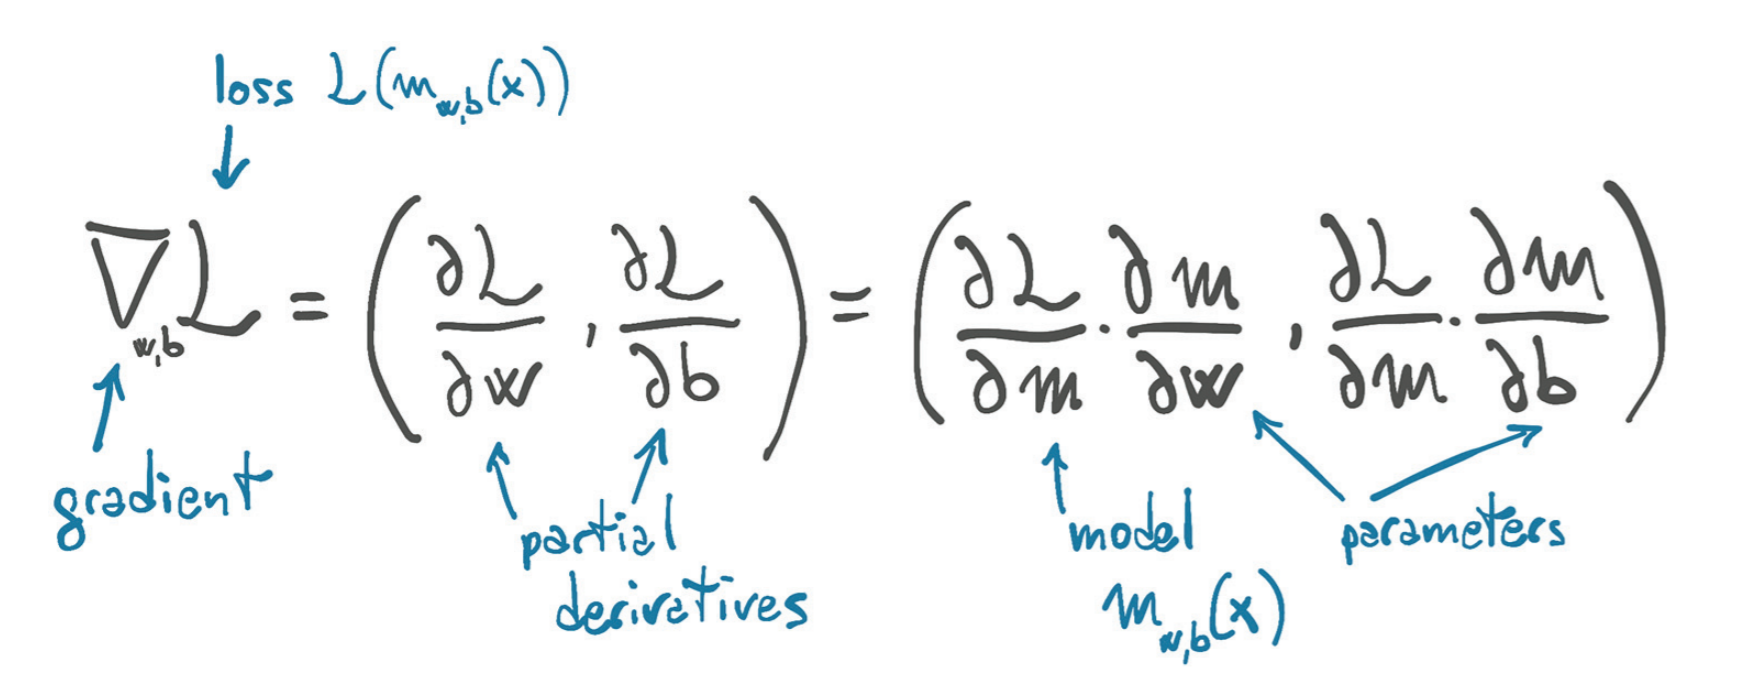

In [ ]:
def dloss_fn(t_p,t_c):
    dsq_diff = 2*(t_p-t_c)/t_p.size(0)
    return dsq_diff
def dmodel_dw(t_u,w,b):
    return t_u
def dmodel_db(t_u,w,b):
    return 1.0

In [ ]:
def grad_fn(t_u,t_c,t_p,w,b):
    dloss_dtp = dloss_fn(t_p,t_c)
    dloss_dw= dloss_dtp * dmodel_dw(t_u,w,b)
    dloss_db=dloss_dtp * dmodel_db(t_u,w,b)
    return torch.stack([dloss_dw.sum(),dloss_db.sum()])

우리는 위의 함수들을 통해 순차적으로 업데이트를 해줄 수 있다.

여기서는 정해진 만큼의 iteration만을 진행하도록한다.


In [ ]:
def training_loop(n_epochs, learning_rate,params,t_u,t_c):
    for epoch in range(1,n_epochs+1):
        w,b=params
        
        t_p=model(t_u,w,b)
        loss = loss_fn(t_p,t_c)
        ## forward pass

        grad = grad_fn(t_u,t_c,t_p,w,b)
        params = params - learning_rate * grad
        ## bacward pass
        
        print('Epoch %d, Loss %f' %(epoch, float(loss)))
    return params


In [ ]:
training_loop( n_epochs = 100, learning_rate = 1e-2, params = torch.tensor([1.0, 0.0]), t_u = t_u, t_c = t_c)

Epoch 1, Loss 1763.884766
Epoch 2, Loss 5802484.500000
Epoch 3, Loss 19408029696.000000
Epoch 4, Loss 64915905708032.000000
Epoch 5, Loss 217130525461053440.000000
Epoch 6, Loss 726257583152928129024.000000
Epoch 7, Loss 2429183416467662896627712.000000
Epoch 8, Loss 8125122549611731432050262016.000000
Epoch 9, Loss 27176882120842590626938030653440.000000
Epoch 10, Loss 90901105189019073810297959556841472.000000
Epoch 11, Loss inf
Epoch 12, Loss inf
Epoch 13, Loss inf
Epoch 14, Loss inf
Epoch 15, Loss inf
Epoch 16, Loss inf
Epoch 17, Loss inf
Epoch 18, Loss inf
Epoch 19, Loss inf
Epoch 20, Loss inf
Epoch 21, Loss inf
Epoch 22, Loss inf
Epoch 23, Loss nan
Epoch 24, Loss nan
Epoch 25, Loss nan
Epoch 26, Loss nan
Epoch 27, Loss nan
Epoch 28, Loss nan
Epoch 29, Loss nan
Epoch 30, Loss nan
Epoch 31, Loss nan
Epoch 32, Loss nan
Epoch 33, Loss nan
Epoch 34, Loss nan
Epoch 35, Loss nan
Epoch 36, Loss nan
Epoch 37, Loss nan
Epoch 38, Loss nan
Epoch 39, Loss nan
Epoch 40, Loss nan
Epoch 41, Loss

tensor([nan, nan])

무한대가 되어버린 이유는 너무 큰 learning rate를 사용하였기 때문이다.

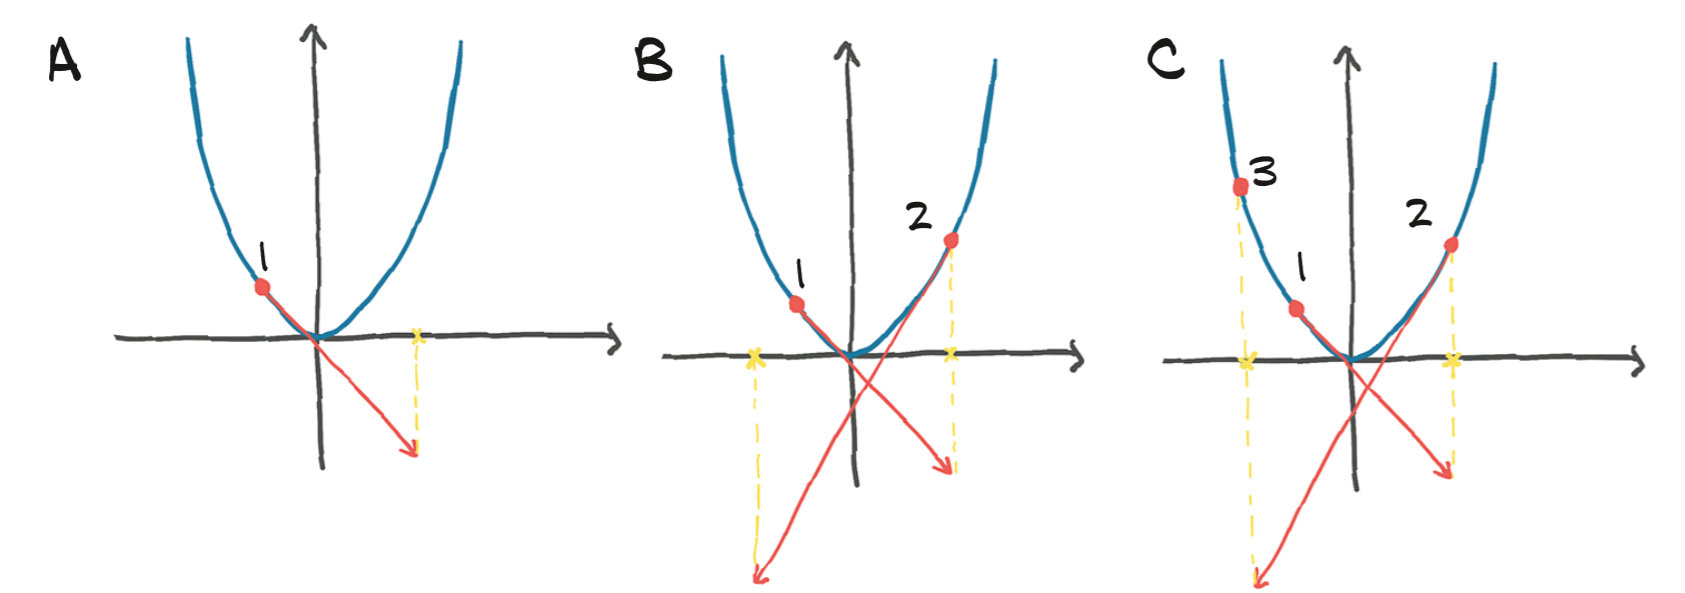

In [ ]:
training_loop( n_epochs = 100, learning_rate = 1e-4, params = torch.tensor([1.0, 0.0]), t_u = t_u, t_c = t_c)

Epoch 1, Loss 1763.884766
Epoch 2, Loss 323.090515
Epoch 3, Loss 78.929634
Epoch 4, Loss 37.552845
Epoch 5, Loss 30.540283
Epoch 6, Loss 29.351154
Epoch 7, Loss 29.148884
Epoch 8, Loss 29.113848
Epoch 9, Loss 29.107145
Epoch 10, Loss 29.105247
Epoch 11, Loss 29.104168
Epoch 12, Loss 29.103222
Epoch 13, Loss 29.102295
Epoch 14, Loss 29.101379
Epoch 15, Loss 29.100466
Epoch 16, Loss 29.099548
Epoch 17, Loss 29.098631
Epoch 18, Loss 29.097717
Epoch 19, Loss 29.096796
Epoch 20, Loss 29.095881
Epoch 21, Loss 29.094959
Epoch 22, Loss 29.094049
Epoch 23, Loss 29.093134
Epoch 24, Loss 29.092216
Epoch 25, Loss 29.091301
Epoch 26, Loss 29.090385
Epoch 27, Loss 29.089464
Epoch 28, Loss 29.088551
Epoch 29, Loss 29.087635
Epoch 30, Loss 29.086714
Epoch 31, Loss 29.085804
Epoch 32, Loss 29.084888
Epoch 33, Loss 29.083967
Epoch 34, Loss 29.083057
Epoch 35, Loss 29.082142
Epoch 36, Loss 29.081221
Epoch 37, Loss 29.080309
Epoch 38, Loss 29.079390
Epoch 39, Loss 29.078474
Epoch 40, Loss 29.077562
Epoch 

tensor([ 0.2327, -0.0438])

위의 예제에서의 문제는 첫 계산에 있어서 weight gradient가 bias  gradient보다 50배 더 컸다는 것이다.

이는 한쪽이 더 학습하기 어렵게 되었다는 것을 의미한다.

이를 해결하기 위해서 값들을 -1.0 에서 1.0 사이에 존재하도록 만드는 것이 추천된다.

이 예제에서는 단순히 0.1을 곱하는 것으로 위에서 언급한 문제를 해결할 수 있다. 



In [ ]:
t_un = 0.1*t_u
params = training_loop( n_epochs = 5000, learning_rate = 1e-2, params = torch.tensor([1.0, 0.0]), t_u = t_un, t_c = t_c)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507153
Epoch 6, Loss 29.392456
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119415
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765553
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503319
Epoch 17, Loss 28.416498
Epoch 18, Loss 28.329973
Epoch 19, Loss 28.243742
Epoch 20, Loss 28.157804
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986797
Epoch 23, Loss 27.901728
Epoch 24, Loss 27.816950
Epoch 25, Loss 27.732464
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564344
Epoch 28, Loss 27.480707
Epoch 29, Loss 27.397362
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149010
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903175
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740679
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.57927

우리는 gradient descent의 결과 w=5.3671 , w=-17.3012의 값을 가지는 것을 확인 할 수 있었다.





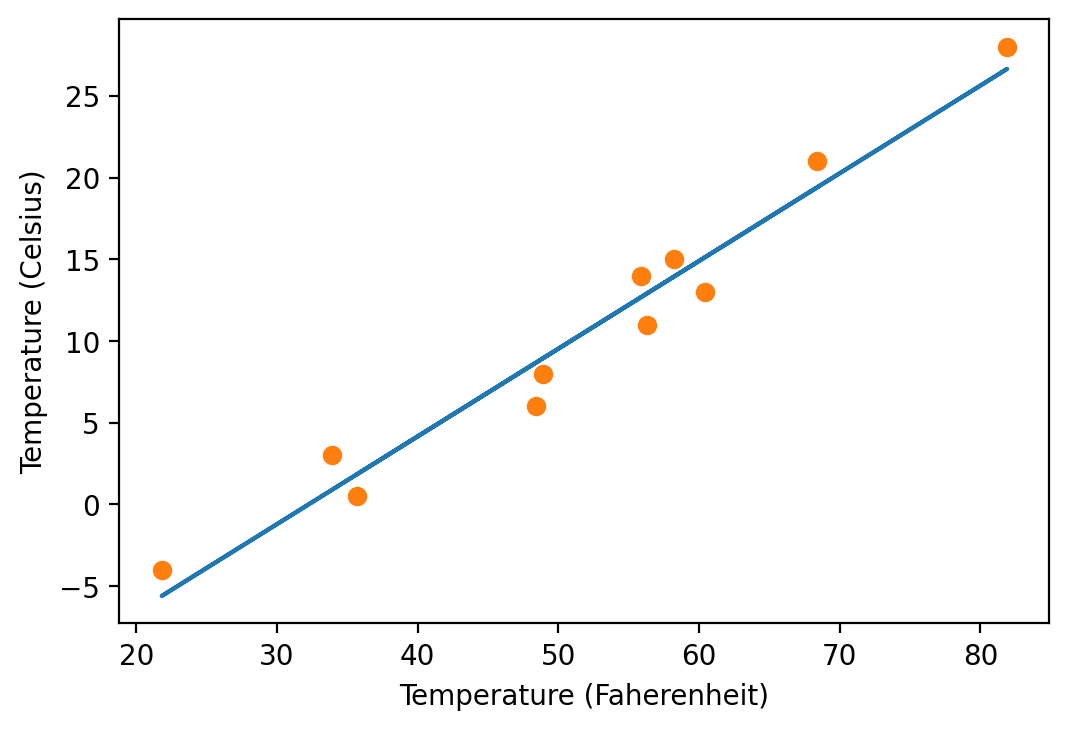

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
t_p=model(t_un, *params)
fig = plt.figure(dpi=200)
plt.xlabel("Temperature (Faherenheit)")
plt.ylabel("Temperature (Celsius)")
plt.plot(t_u.numpy(),t_p.detach().numpy())
plt.plot(t_u.numpy(),t_c.numpy(),'o')

## PyTorch’s autograd: Backpropagating all things



In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

In [ ]:
params.grad is None

True

requires_grad=True 는 앞으로 params에 적용되는 operation을 추적할 수 있게 된다.


backward를 호출함으로써 params에 gradient를 계산할 수 있게 된다.


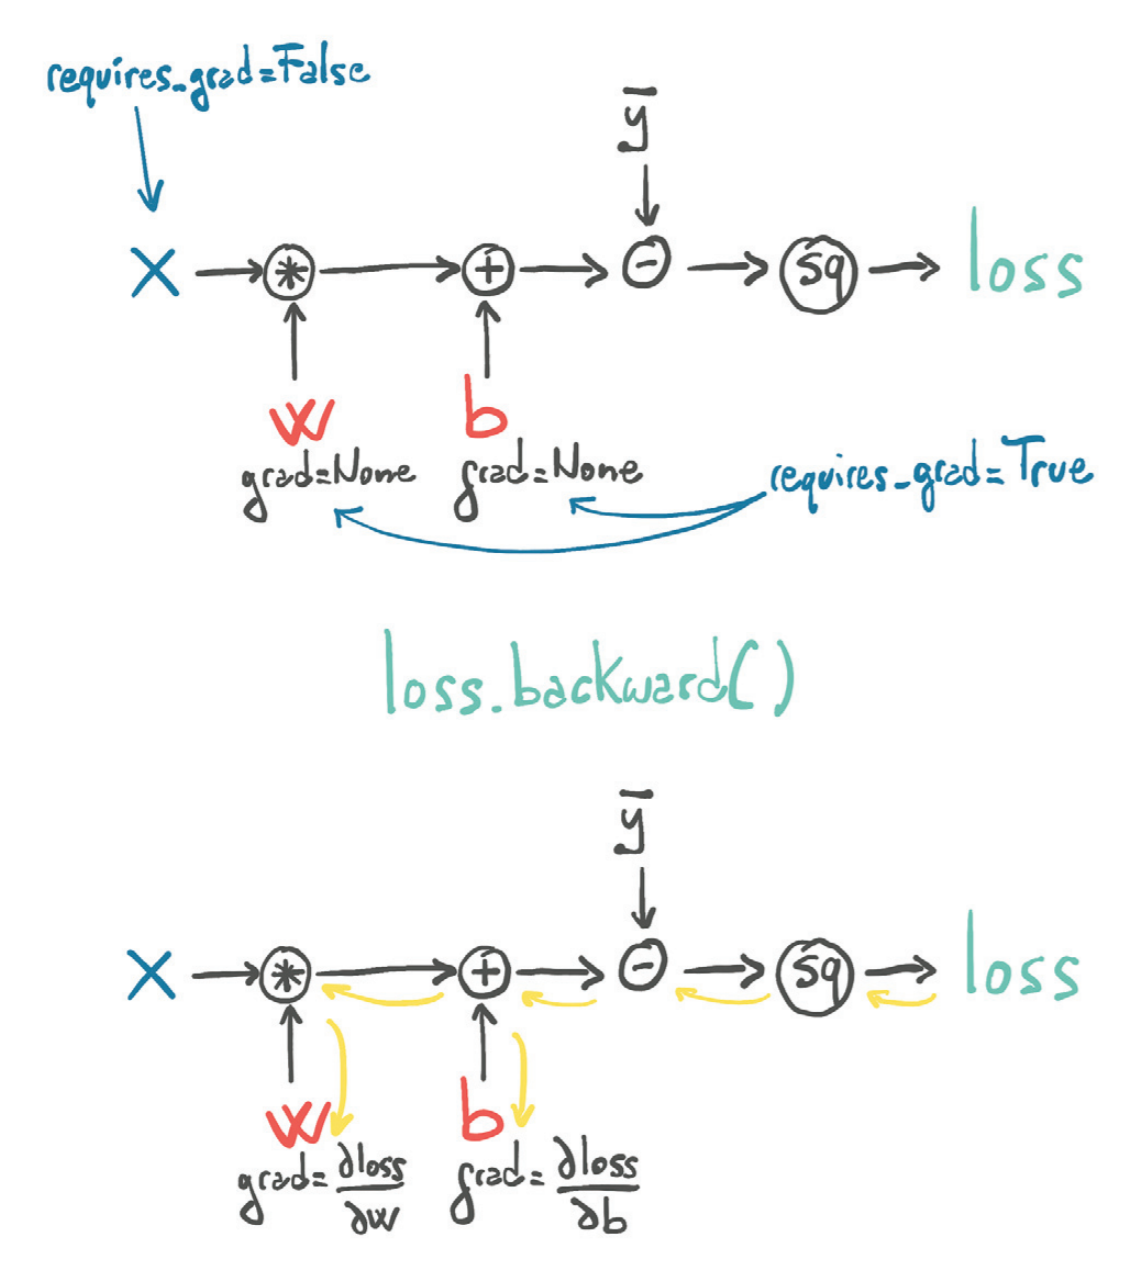

In [ ]:
loss = loss_fn(model(t_u,*params),t_c)
loss.backward()
params.grad

tensor([4517.2969,   82.6000])

이를 통해서 training_loop를 다음과 같이 바꿀 수 있다.



In [ ]:
def training_loop_autograd(n_epochs,learning_rate,params,t_u,t_c):
    for epoch in range(1,n_epochs+1):
        if params.grad is not None:
            params.grad.zero_()
        
        t_p = model(t_u,*params)
        loss =loss_fn(t_p,t_c)
        loss.backward()

        with torch.no_grad():
            params -= learning_rate * params.grad
        
        if epoch % 500 == 0 :
            print('Epoch %d, Loss %f' % (epoch,float(loss)))
    return params


grad.zero_()를 호출해야 하는 이유는 그래야 gradient를 초기화 시켜 올바른 방향으로 learnnig을 진행할 수 있기 때문이다.



참고 ) https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch

with torch.no_grad()는 params에 행하는 빼기 연산이 gradient 계산시에 포함되지 않도록 하기 위해서 필요하다.

참고 ) https://easy-going-programming.tistory.com/14



In [ ]:
training_loop_autograd( n_epochs = 5000, learning_rate = 1e-2, params = torch.tensor([1.0, 0.0], requires_grad=True), t_u = t_un, t_c = t_c)

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

## Optimizers

In [ ]:
import torch.optim as optim

dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

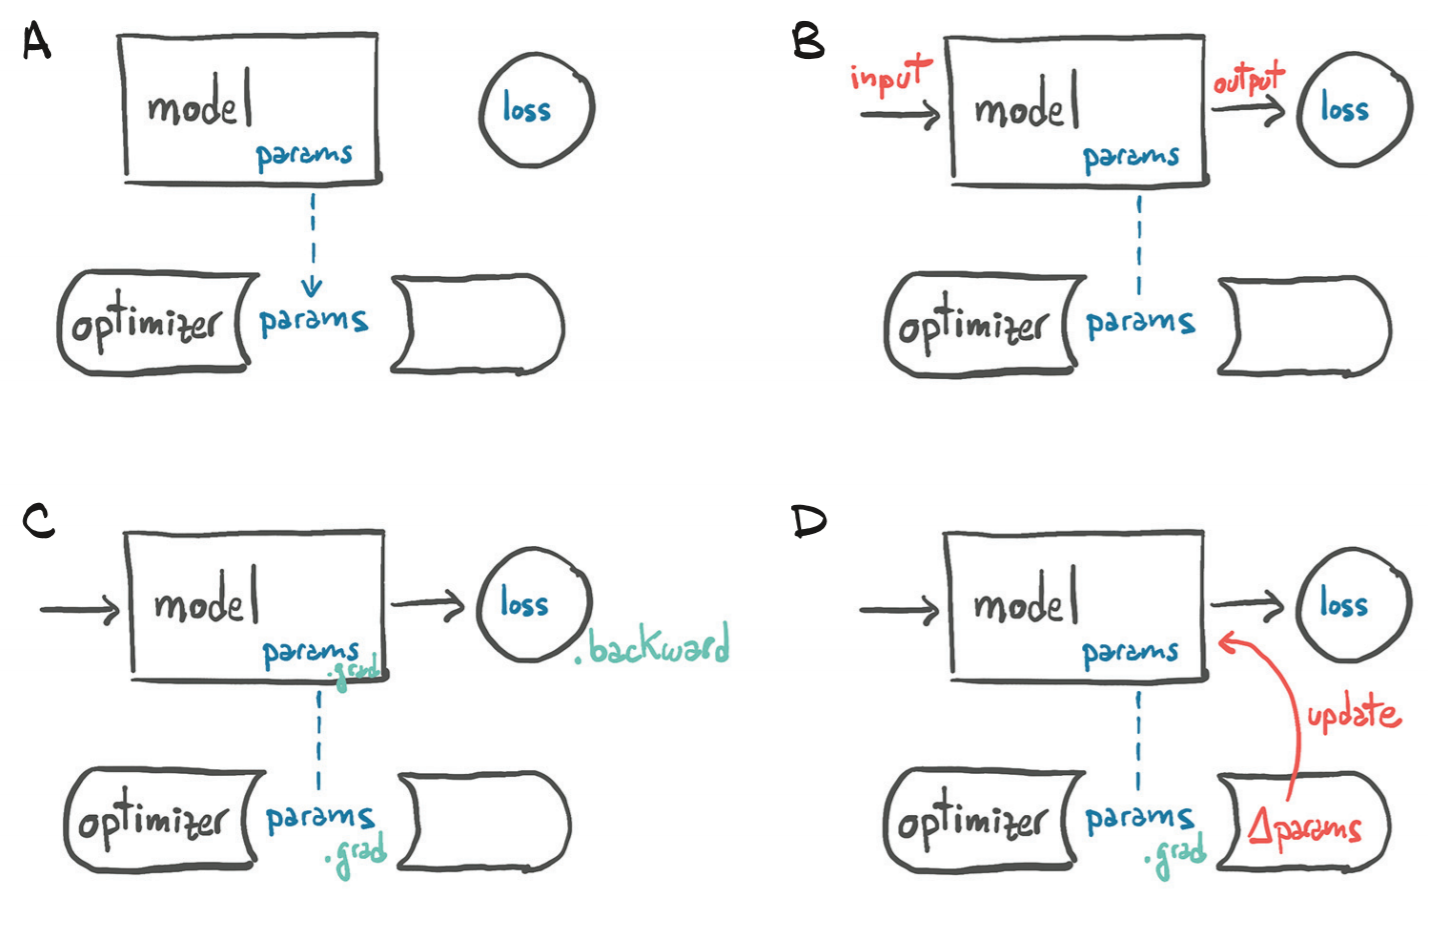

위 그림은 optimizer가 어떻게 동작하는지를 간단하게 보여준다.

A는 optimizer가 어떻게 개념적으로 존재하는지를 보여준다.

B는 input으로부터 loss가 계산된 상황을 말한다.

C는 .backward가 호출되어 .grad가 계산된 상황이다.

D는 optimizer가 model에 접근하여 parameter를 update한다.

이제부터는 optimizer를 이용하여 gradient descent를 구현해보도록 하자.

In [ ]:
params = torch.tensor([1.0,0.0],requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params],lr=learning_rate)


In [ ]:
t_p = model(t_u,*params)
loss = loss_fn(t_p,t_c)
loss.backward()

optimizer.step()

params

tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)

params는 .step() 함수를 통해 update된다. 

In [ ]:
def training_loop_opt(n_epochs,optimizer,params,t_u,t_c):
    for epoch in range(1,n_epochs + 1):
        t_p=model(t_u,*params)
        loss = loss_fn(t_p,t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0 :
            print('Epoch %d, Loss %f' % (epoch,float(loss)))
    return params

optimizer도 또한 위와 마찬가지로 .zero_grad()를 해주어 gradient를 초기화 해주어야한다.


In [ ]:
params = torch.tensor([1.0,0.0],requires_grad=True)
learnnig_rate = 1e-2
optimizer = optim.SGD([params],lr = learnnig_rate)
training_loop_opt(n_epochs=5000,optimizer=optimizer,params=params,t_u=t_un,t_c=t_c)

Epoch 500, Loss 7.860120
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

## Training, validation, and overfitting


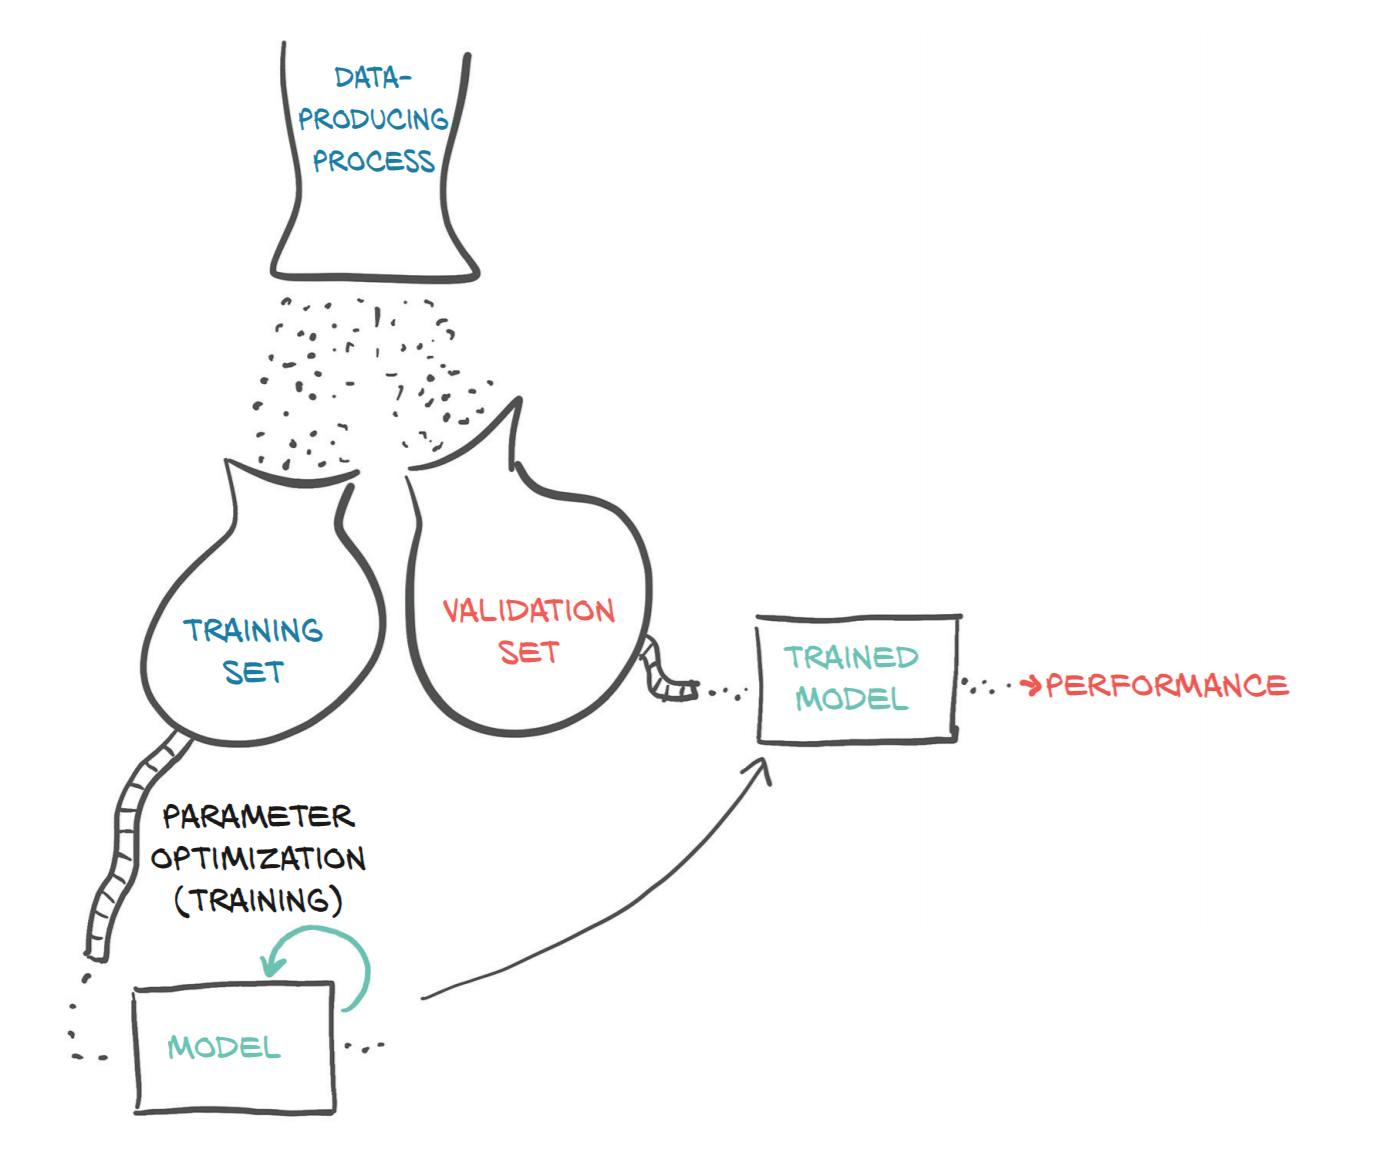


만약 independent data points에 대한 loss가 기존의 loss로 부터 예상한 값보다 높다면 overfitting이 발생하였을 가능성이 높다.

이를 해결해기 위해서는 dataset을 validation set과 training set으로 나누어 준다. 모델은 training set에 있는 data들로만 학습을 해야한다. 그리고 모델의 정확도를 측정하기위해서 validation set을 사용해야한다. 

### splitting a dataset


tensor를 permutation 하는 것은 randperm 함수를 통해 할 수 있다.

In [91]:
n_samples = t_u.shape[0]
n_val = int(0.2*n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
train_indices, val_indices

(tensor([ 5,  8,  4,  7, 10,  0,  9,  6,  2]), tensor([3, 1]))

위의 과정을 통해 0~10까지의 숫자를 랜덤으로 나눌 수 있게 되었다.

In [92]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = train_t_u * 0.1
val_t_un = val_t_u * 0.1

In [93]:
def training_loop_tv(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1,n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p,train_t_c)

        val_t_p = model(val_t_u,*params)
        val_loss = loss_fn(val_t_p,val_t_c)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch <= 3 or epoch % 500 == 0 :
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f}," f" Validation loss {val_loss.item():.4f}")
    return params
            

In [95]:
params = torch.tensor([1.0,0.0],requires_grad=True)
learnnig_rate = 1e-2
optimizer = optim.SGD([params],lr=learnnig_rate)
training_loop_tv( n_epochs = 3000, optimizer = optimizer, params = params, train_t_u = train_t_un, val_t_u = val_t_un, train_t_c = train_t_c, val_t_c = val_t_c)


Epoch 1, Training loss 46.7604, Validation loss 231.5821
Epoch 2, Training loss 29.0880, Validation loss 140.4361
Epoch 3, Training loss 24.9477, Validation loss 104.9907
Epoch 500, Training loss 7.4744, Validation loss 27.9572
Epoch 1000, Training loss 3.9018, Validation loss 13.4571
Epoch 1500, Training loss 3.1254, Validation loss 8.5952
Epoch 2000, Training loss 2.9566, Validation loss 6.7411
Epoch 2500, Training loss 2.9199, Validation loss 5.9664
Epoch 3000, Training loss 2.9119, Validation loss 5.6247


tensor([  5.0222, -15.9270], requires_grad=True)

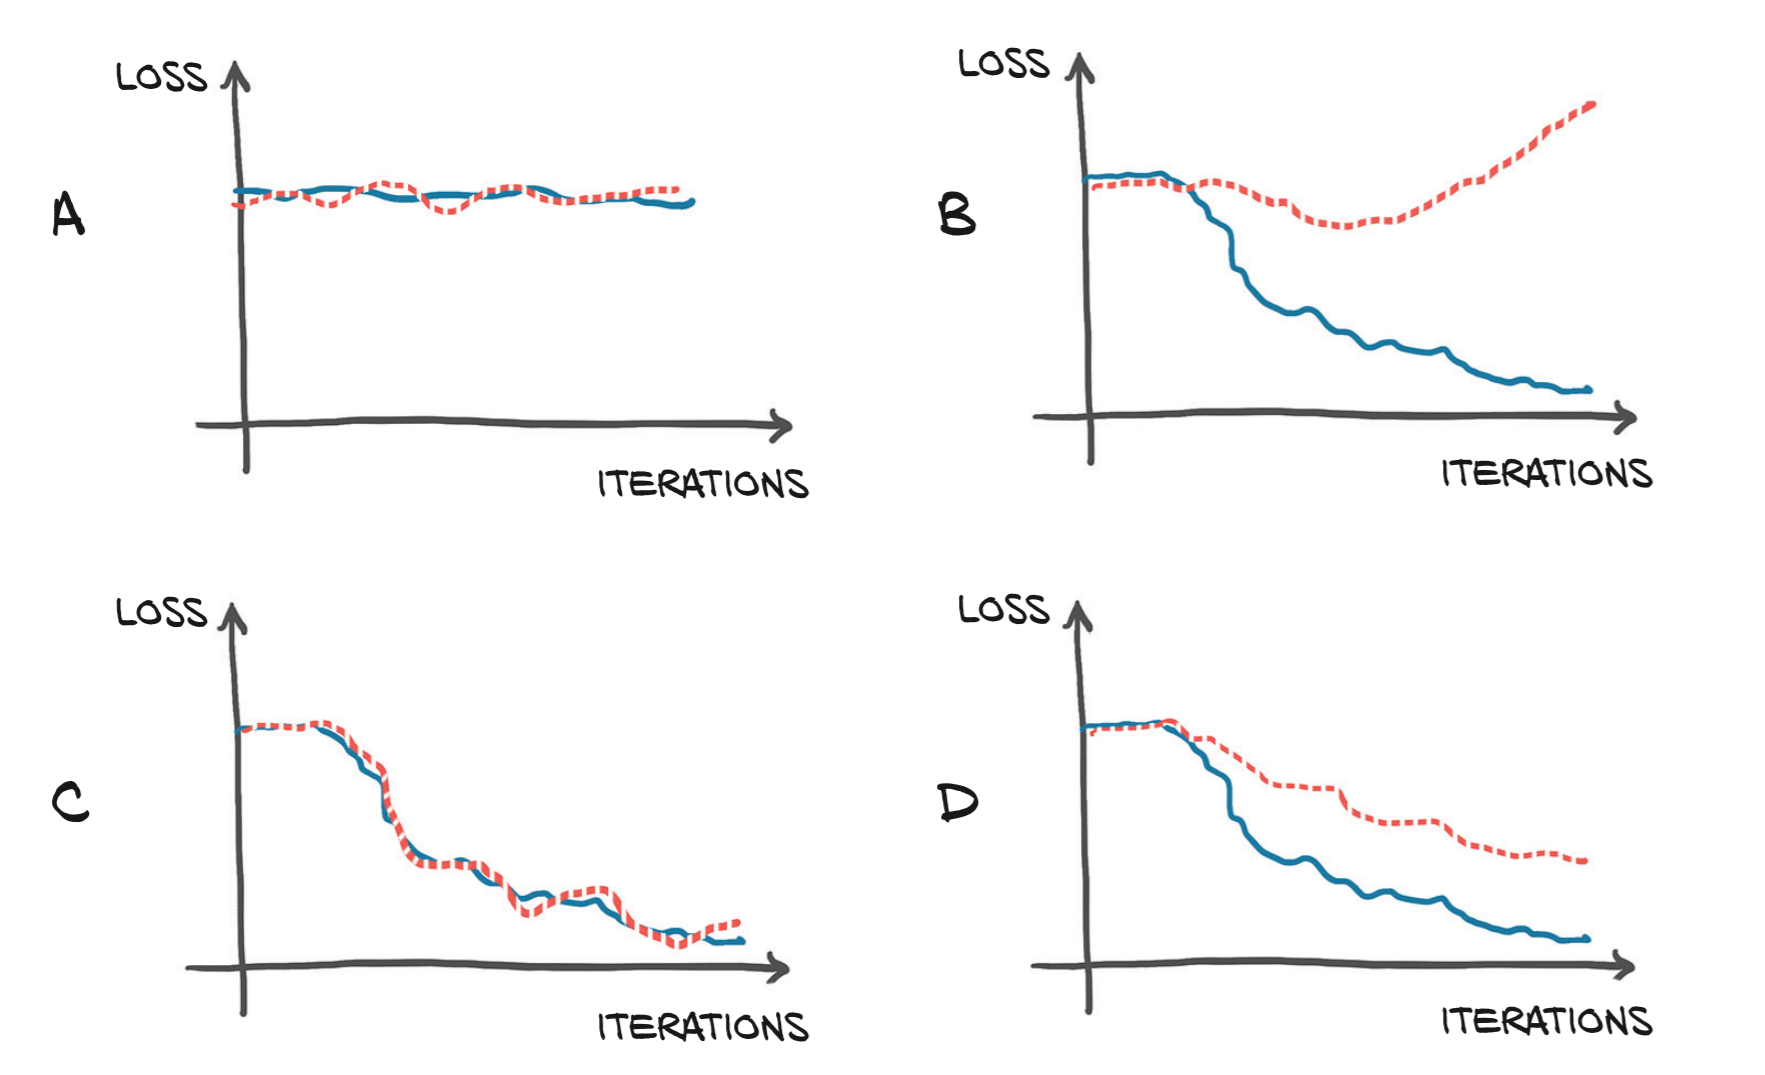

위 그림에서 붉은 선이 validation이고 파란 선이 training일때,

C의 경우가 가장 이상적인 경우이다.

D의 경우는 허용할만한 수준이다.

A의 경우는 러닝이 진행되고 있지 않다.

B의 경우는 overfitting이 발생하였다.


엄밀하게 이야기를 한다면 validation loss에 대해서는 고려하지 않아야한다. 때문에 requires_grad를 강제로 false로 만들어 고려하지 않도록 하는 것이 더욱 좋다.

In [ ]:
def training_loop_lossfalse(n_epochs, optimizer, params, train_t_u, val_t_u,
                  train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)

        with torch.no_grad(): 
            val_t_p = model(val_t_u, *params)
            val_loss = loss_fn(val_t_p, val_t_c)
            assert val_loss.requires_grad == False 
            
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

In [ ]:
def calc_forward(t_u, t_c, is_train):
    with torch.set_grad_enabled(is_train):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
    return loss